#Import Librararies

In [97]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [98]:
#from google.colab import drive
#drive.mount('/content/drive')

In [99]:
#cd /content/drive/MyDrive/MSDS-20/After Mid content/Stat/RepairDesk UzairBhaiGroup/data_stats

In [100]:
# Import as Dataframe
df = pd.read_csv('revenue_and_employees_24_months.csv')

df['earning']=df['earning'].astype('int')


In [101]:
df.head()

,year,month,store_id,earning,employess,country,current_working_status
0,2019,1,38,55114,6,Australia,1
1,2019,2,38,42724,5,Australia,1
2,2019,3,38,37070,5,Australia,1
3,2019,4,38,33607,5,Australia,1
4,2019,5,38,30864,3,Australia,1


In [102]:
def merge_column_year_month(df):
    df['date'] = df['year'].map(str)+ '-' +df['month'].map(str)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m').dt.strftime('%Y-%m')
    df = df.sort_values(by = 'date')
    return df

In [103]:
df = merge_column_year_month(df)
df.head()

,year,month,store_id,earning,employess,country,current_working_status,date
0,2019,1,38,55114,6,Australia,1,2019-01
5040,2019,1,5088,35198,3,United States,1,2019-01
5016,2019,1,5083,29082,5,United States,1,2019-01
4992,2019,1,5076,17934,1,United States,1,2019-01
480,2019,1,652,59767,10,Australia,1,2019-01


## Outlier

In [104]:
from scipy import stats
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
#     print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [105]:
out_column=['earning','employess']
for c in out_column:
    print('smallest outliere value in {0} column is {1}'.format(c,min(find_anomalies(df[c]))))

smallest outliere value in earning column is 11027650
smallest outliere value in employess column is 9


In [106]:
print(df[df.earning > 6662000].shape)
print(df[df.employess > 8].shape)

(72, 8)
(163, 8)


In [107]:
df_months_earnings=df.groupby([df['date']]).agg({'earning':'sum'})
df_months_earnings.head(24)

,earning
date,
2019-01,88128060
2019-02,86912674
2019-03,99730894
2019-04,124246987
2019-05,127809780
2019-06,136174552
2019-07,132419161
2019-08,135593326
2019-09,137307958


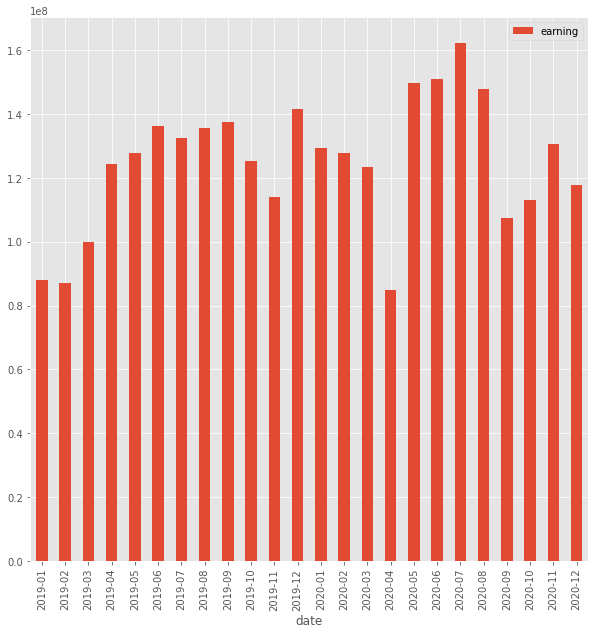

In [108]:
df_months_earnings.plot( kind='bar',figsize=(10,10))

In [109]:
df_months_employee=df.groupby([df['date']]).agg({'employess':'sum'})
df_months_employee.head(24)

,employess
date,
2019-01,1070
2019-02,1091
2019-03,1085
2019-04,1053
2019-05,1098
2019-06,1069
2019-07,1093
2019-08,1129
2019-09,1114


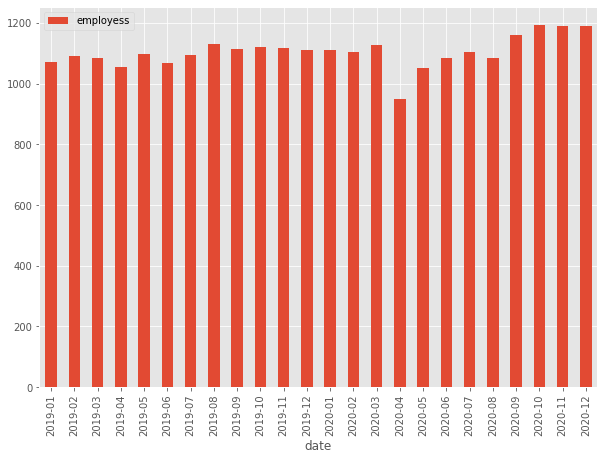

In [110]:
df_months_employee.plot( kind='bar',figsize=(10,7))

In [111]:
year_data = df.groupby('year')
data_19 =year_data.get_group(2019)
data_20 =year_data.get_group(2020)

         earning
year            
2019  1449192626
2020  1544398168


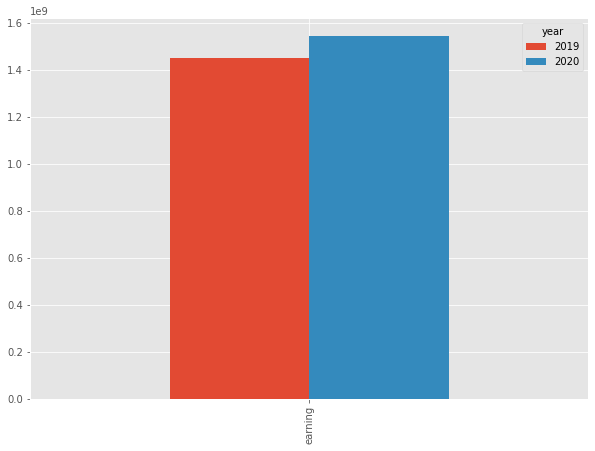

In [138]:
# print(df.groupby('year').get_group(2019).agg({'earning':'sum'}))
# print(df.groupby('year').get_group(2019)['earning'])
print(year_data.agg({'earning':'sum'}))
data=year_data.agg({'earning':'sum'})
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))

      employess
year           
2019      13152
2020      13341


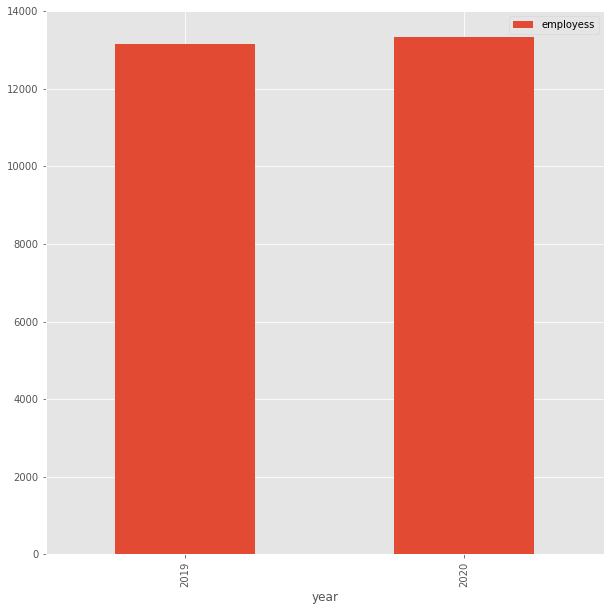

In [137]:
print(year_data.agg({'employess':'sum'}))
year_data.agg({'employess':'sum'}).plot(kind='bar',figsize=(10,10))



In [114]:
# fig,ax = plt.subplots(figsize=(10,5))
# ax.bar(df.groupby('year').get_group(2019)['earning'],df.groupby('year').get_group(2019)['date'],label='2019')
# ax.plot()
# data_19.plot(kind='bar',figsize=(10,10))

In [115]:
df['quater']= pd.PeriodIndex(df.date, freq='Q')

In [116]:
df.quater=df.quater.astype(str)
df.quater.dtypes

dtype('O')

In [117]:
data_by_quater = df.groupby('quater')

In [118]:
data_by_quater.agg({'earning':'sum'})

,earning
quater,
2019Q1,274771628
2019Q2,388231319
2019Q3,405320445
2019Q4,380869234
2020Q1,380446412
2020Q2,385610444
2020Q3,417106185
2020Q4,361235127


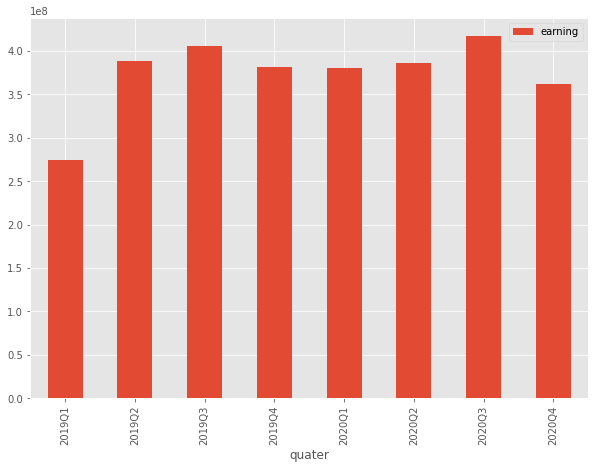

In [119]:
data_by_quater.agg({'earning':'sum'}).plot(kind='bar',figsize=(10,7))

        employess
quater           
2019Q1       3246
2019Q2       3220
2019Q3       3336
2019Q4       3350
2020Q1       3339
2020Q2       3083
2020Q3       3348
2020Q4       3571


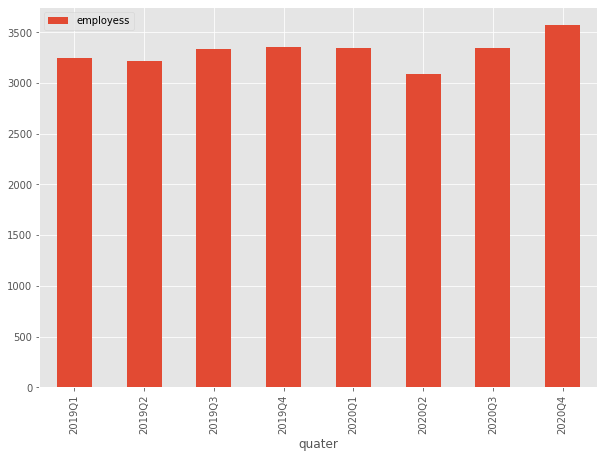

In [120]:
print(data_by_quater.agg({'employess':'sum'}))
data_by_quater.agg({'employess':'sum'}).plot(kind='bar',figsize=(10,7))

In [ ]:
data_19.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5)).plot(kind='bar',figsize=(10,7))

In [ ]:
data_20.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5)).plot(kind='bar',figsize=(10,7))

In [ ]:
# Read the Purchase File
df_purchase= pd.read_csv('inventory_purchase.csv')
df_purchase.head(5)

In [ ]:
yearly_purch=df_purchase.groupby('year').agg({'purchase_expense':'sum'})
yearly_purch

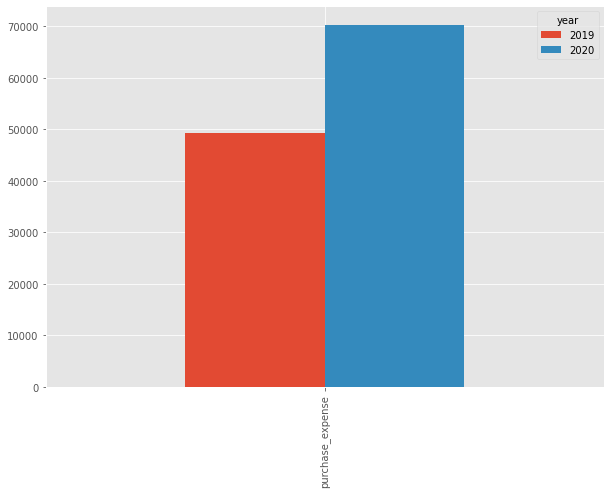

In [125]:
# Plot Purchase According to Year Wise
data=yearly_purch
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))


In [126]:
# Seprate Data 2019 and 2020
year_data = df.groupby('year')
year_data1 = df_purchase.groupby('year')

# Store 2019 Data new Variable
data_19 =year_data.get_group(2019)
purch_19=year_data1.get_group(2019)

# Store 2020 Data new Variable
data_20 =year_data.get_group(2020)
purch_20=year_data1.get_group(2020)

#Top 5 Countries in term of Reveneu 2019

Text(0, 0.5, 'Reveneue 2019')

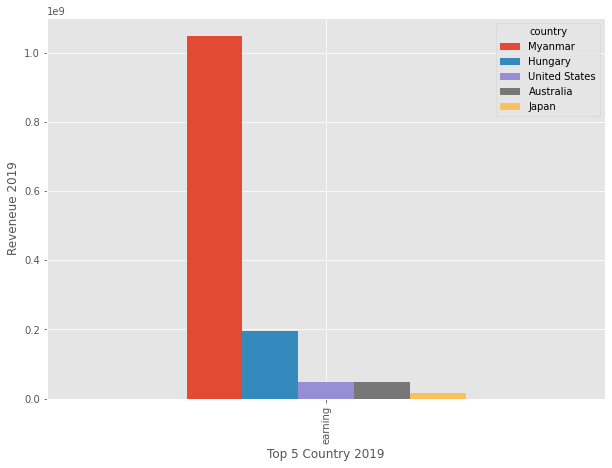

In [127]:
# Get  Revenue of Top 5 Country in 2019
data=data_19.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2019')
plt.ylabel('Reveneue 2019')

#Top 5 Countries in term of Reveneu 2020

Text(0, 0.5, 'Reveneu 2020')

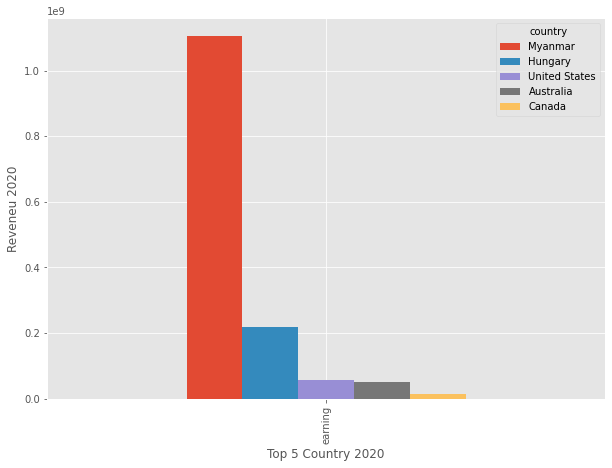

In [128]:
# Get  Revenue of Top 5 Country in 2020
data=data_20.groupby('country').agg({'earning':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2020')
plt.ylabel('Reveneu 2020')

#Top 5 Countries in term of Employess 2019

Text(0, 0.5, 'Employess 2019 ')

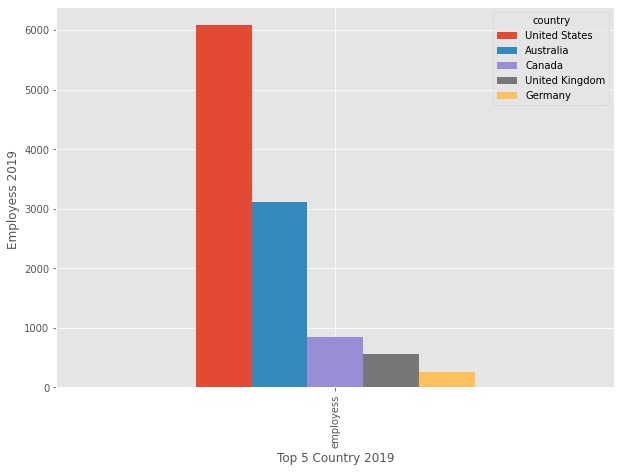

In [129]:
# Get Num of Employee of Top 5 Country 2019
data=data_19.groupby('country').agg({'employess':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2019')
plt.ylabel('Employess 2019 ')

#Top 5 Countries in term of Emplyess 2020

Text(0, 0.5, 'Employess 2020')

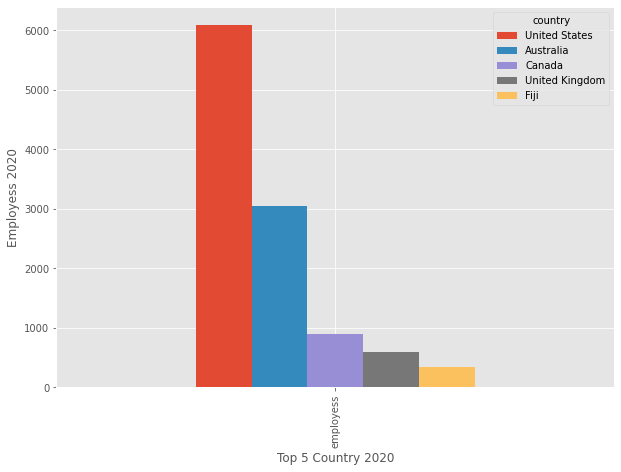

In [130]:
# Get Num of Employee of Top 5 Country 2020
data=data_20.groupby('country').agg({'employess':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2020')
plt.ylabel('Employess 2020')

#Top 5 Countries in term of Purchase Expense 2019

Text(0, 0.5, 'Purchase Expense 2019 ')

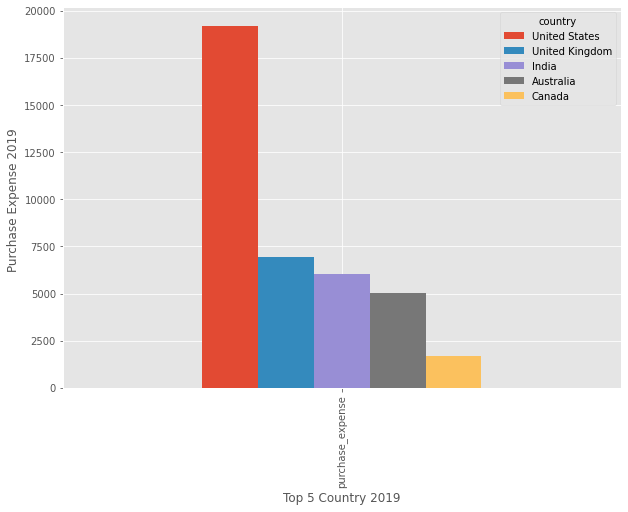

In [131]:
# Get  Purchase Expense of Top 5 Country 2019
data=purch_19.groupby('country').agg({'purchase_expense':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2019')
plt.ylabel('Purchase Expense 2019 ')

#Top 5 Countries in term of Purchase Expense 2020

Text(0, 0.5, 'Purchase Expense 2020 ')

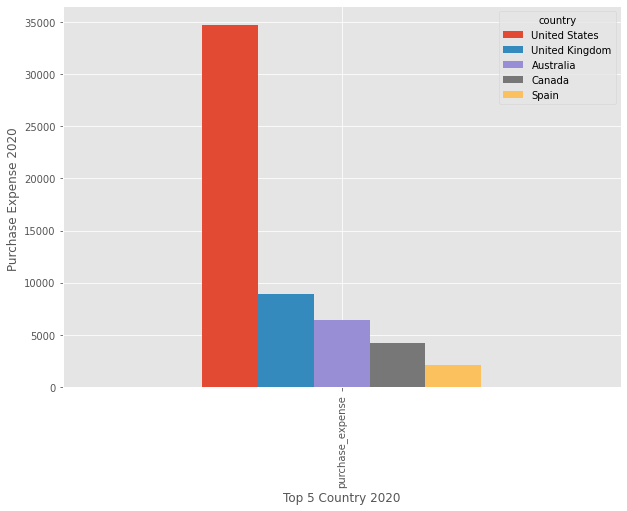

In [132]:
# Get  Pujrchase Expense of Top 5 Country 2020
data=purch_20.groupby('country').agg({'purchase_expense':'sum'}).apply(lambda x: x.sort_values(ascending=False).head(5))
plt.style.use('ggplot')
data.T.plot(kind='bar',figsize=(10,7))
plt.xlabel('Top 5 Country 2020')
plt.ylabel('Purchase Expense 2020 ')